## **K-MEANS**

#### **Python Libraries**

In [100]:
!pip install yellowbrick

In [110]:
import numpy as np
import pandas as pd 
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

#### **Dataset**

In [102]:
usarests = pd.read_csv(r'C:\Users\AleynaCihangir\Desktop\MarketPlace PowerBrands Projects\USArrests.csv', index_col = 0)
df = usarests.copy()
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [103]:
print(colored("\033[1m" + "Information About Null Values on Dataset: ", "blue"),'\n', df.isnull().sum()) 
print(colored("\033[1m" + "Dataset's Information: ", "blue"))
df.info()

Information About Null Values on Dataset:  
 Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64
Dataset's Information: 
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


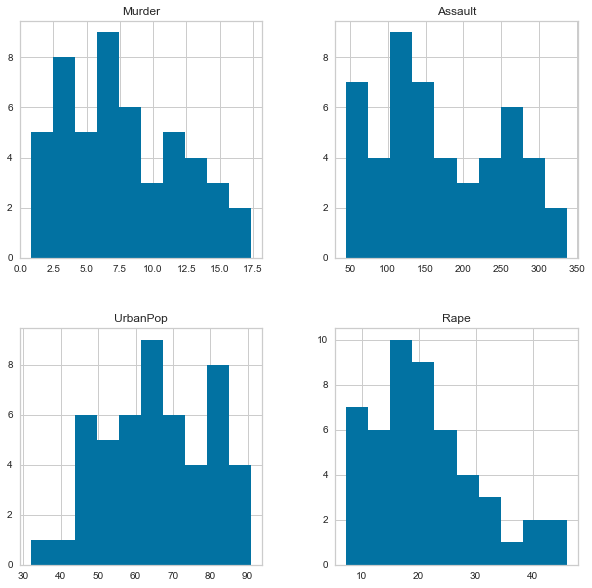

In [105]:
df.hist(figsize = (10,10));

#### **Model**

In [106]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
print(colored("\033[1m" + "Clusters: ", "blue"), k_fit.n_clusters) 
print(colored("\033[1m" + "Clusters Centers: ", "blue"), '\n', k_fit.cluster_centers_) 
print(colored("\033[1m" + "Labels: ", "blue"),'\n', k_fit.labels_) 

Clusters:  4
Clusters Centers:  
 [[  2.95        62.7         53.9         11.51      ]
 [ 11.8125     272.5625      68.3125      28.375     ]
 [  5.59       112.4         65.6         17.27      ]
 [  8.21428571 173.28571429  70.64285714  22.84285714]]
Labels:  
 [1 1 1 3 1 3 2 1 1 3 0 2 1 2 0 2 2 1 0 1 3 1 0 1 3 2 2 1 0 3 1 1 1 0 2 3 3
 2 3 1 0 3 3 2 0 3 3 0 0 3]


#### **Visulation**

In [107]:
print(colored("\033[1m" + "Sample Predicts: ", "blue"), rf_model.predict(X_test)[0:5]) 
y_pred = rf_model.predict(X_test)
print(colored("\033[1m" + "RMSE: ", "blue"), np.sqrt(mean_squared_error(y_test, y_pred))) 

NameError: name 'rf_model' is not defined

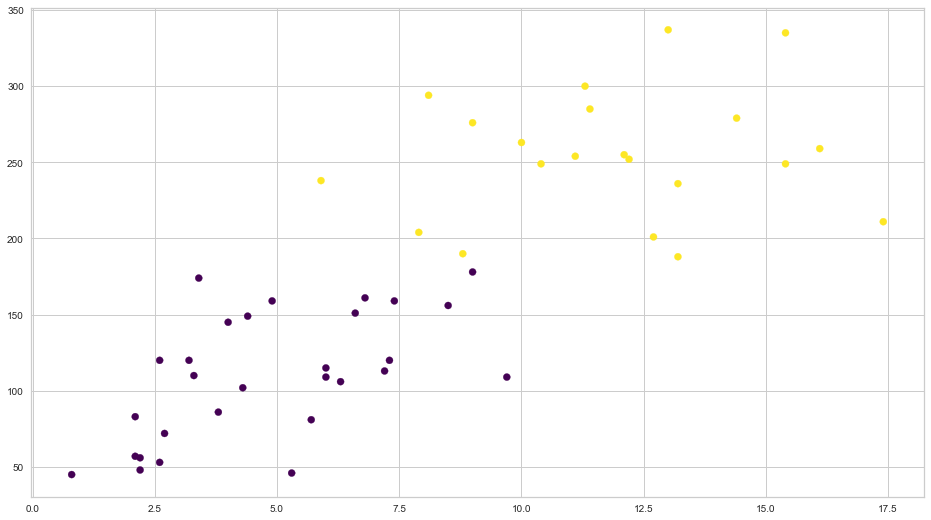

In [108]:
k_means = KMeans(n_clusters = 2).fit(df)
clusters_ = k_means.labels_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters_, s = 50, cmap = "viridis");

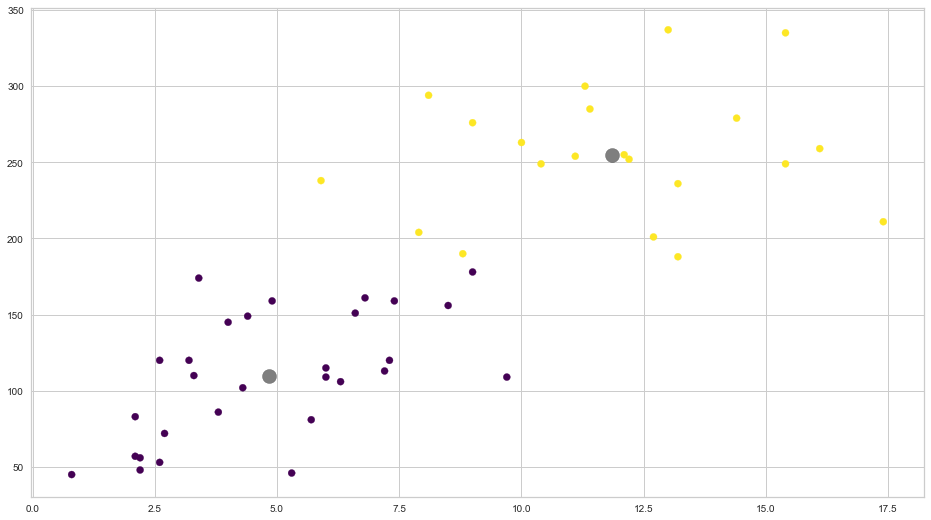

In [109]:
centers_ = k_means.cluster_centers_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters_, s = 50, cmap = "viridis")
plt.scatter(centers_[:,0], centers_[:,1], c = "black", s = 200, alpha=0.5);

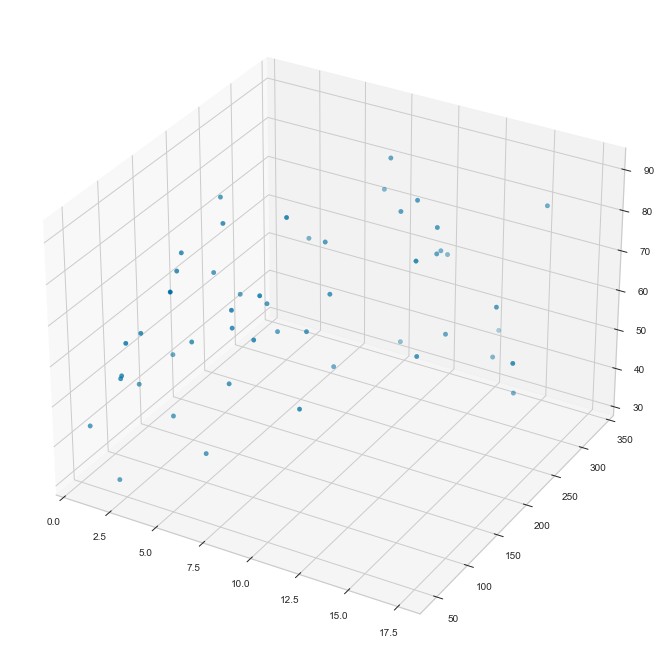

In [111]:
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure();
ax = Axes3D(fig);
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]);

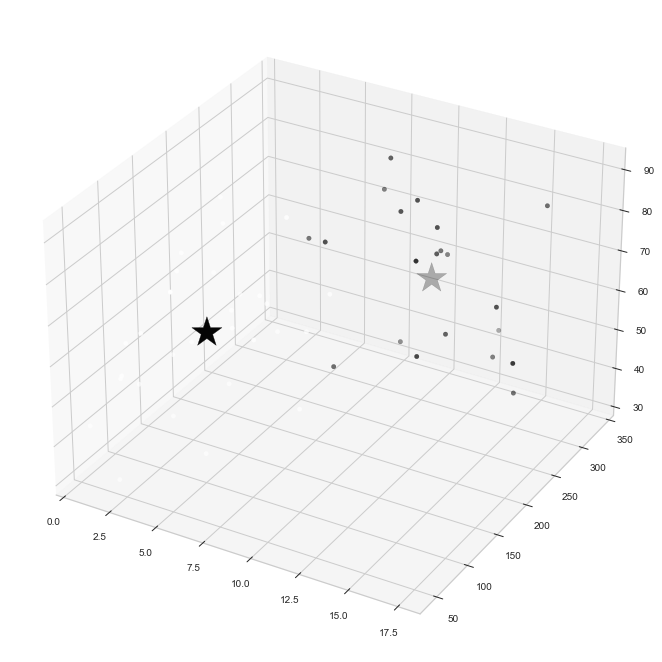

In [112]:
fig = plt.figure();
ax = Axes3D(fig);
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c= clusters_);
ax.scatter(centers_[:,0], centers_[:,1], centers_[:,2], marker='*', c='#050505', s=1000);

#### **Elbow Method**

C:\Users\AleynaCihangir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


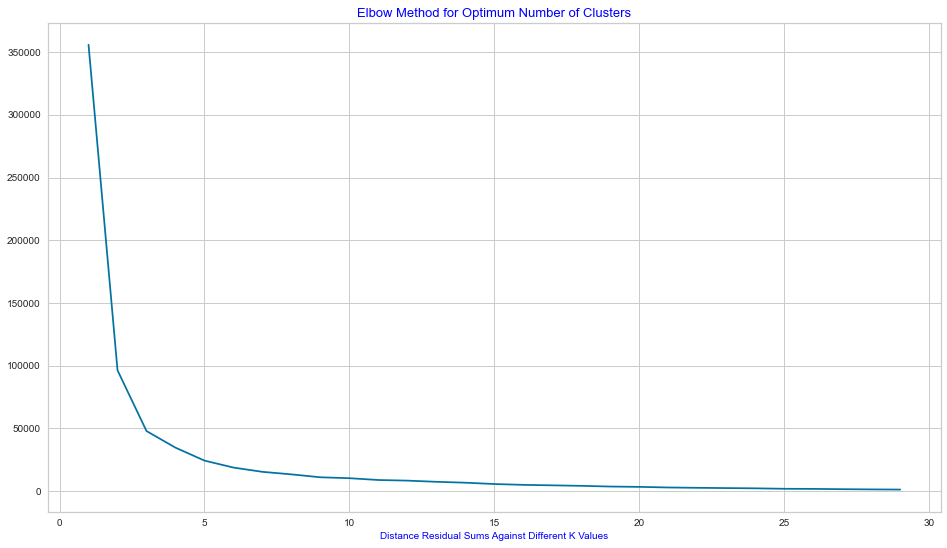

In [113]:
ssd = []
K = range(1,30)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)
plt.plot(K, ssd, "bx-");
plt.xlabel("Distance Residual Sums Against Different K Values", fontsize=10, color="blue");
plt.title("Elbow Method for Optimum Number of Clusters", fontsize=13, color="blue");

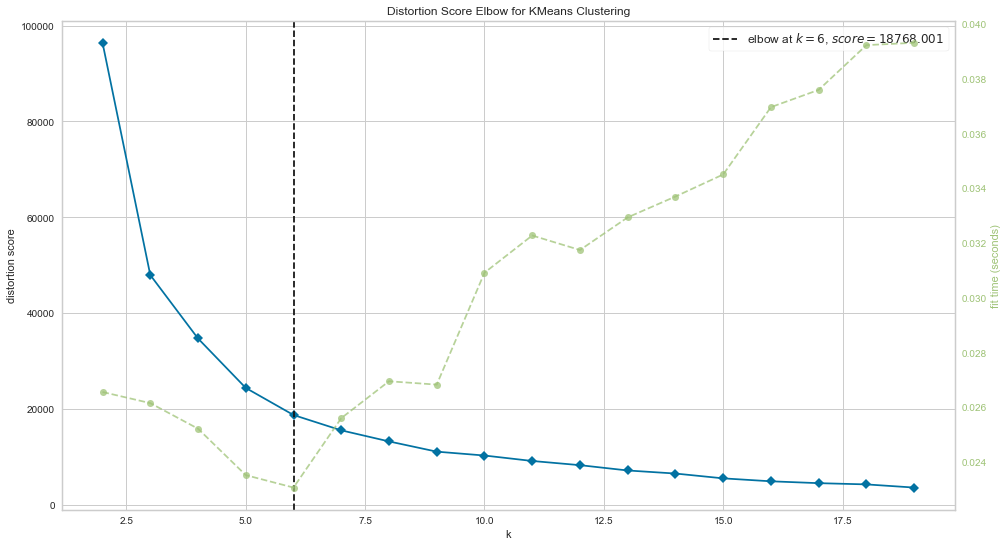

In [114]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20));
visu.fit(df);
visu.poof();

In [115]:
pd.DataFrame({"States": df.index, "Clustera": clusters_})
df["Kume_No"] = clusters_
df.head()

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,1
